In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm_notebook

In [42]:
data = pd.read_csv('./data/train_V2.csv')
train_df, sample_df = train_test_split(data, train_size = 0.90)

In [43]:
# dataframe display 옵션
pd.set_option('display.max_columns' , 30)
pd.set_option('display.width', None)

In [44]:
## 메모리 절약
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [37]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667045 entries, 100851 to 595476
Data columns (total 29 columns):
Id                 667045 non-null object
groupId            667045 non-null object
matchId            667045 non-null object
assists            667045 non-null int8
boosts             667045 non-null int8
damageDealt        667045 non-null float16
DBNOs              667045 non-null int8
headshotKills      667045 non-null int8
heals              667045 non-null int8
killPlace          667045 non-null int8
killPoints         667045 non-null int16
kills              667045 non-null int8
killStreaks        667045 non-null int8
longestKill        667045 non-null float16
matchDuration      667045 non-null int16
matchType          667045 non-null object
maxPlace           667045 non-null int8
numGroups          667045 non-null int8
rankPoints         667045 non-null int16
revives            667045 non-null int8
rideDistance       667045 non-null float16
roadKills          66704

In [45]:
sample_df = reduce_mem_usage(sample_df)

In [19]:
sample_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


In [12]:
matchTyp = {'squad-fpp': 0, 'duo': 1, 'solo-fpp': 2, 'squad': 3, 'duo-fpp': 4, 'solo': 5,
       'normal-squad-fpp': 6, 'crashfpp': 7, 'flaretpp': 8, 'normal-solo-fpp': 9,
       'flarefpp': 10, 'normal-duo-fpp': 11, 'normal-duo': 12, 'normal-squad': 13,
       'crashtpp': 14, 'normal-solo': 15 }
train_df['matchType'] = train_df['matchType'].replace(matchTyp)

### Pearson correlation between variables

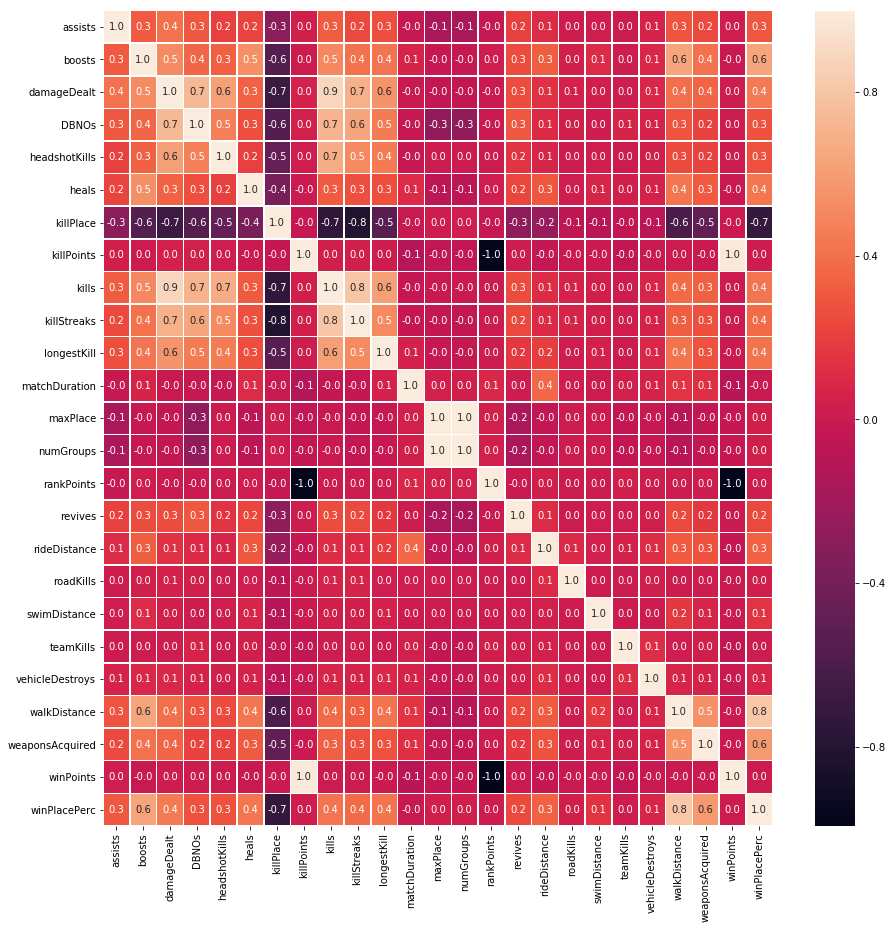

In [15]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(sample_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [2]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='boosts', y="winPlacePerc", data=sample_df)
fig.axis(ymin=0, ymax=1);

NameError: name 'plt' is not defined

### 위 그림을 보면, boosts를 많이 쓴 사람들의 분포가 winPlaceperc가 높음을 알 수 있음.

### headshot rate

In [8]:
headshot = sample_df[['kills','winPlacePerc','headshotKills']]
headshot['headshotrate'] = headshot['headshotKills'] / headshot['kills']

In [9]:
headshot.corr()

,kills,winPlacePerc,headshotKills,headshotrate
kills,1.000000,0.419916,0.674275,0.021278
winPlacePerc,0.419916,1.000000,0.277722,0.012415
headshotKills,0.674275,0.277722,1.000000,0.666980
headshotrate,0.021278,0.012415,0.666980,1.000000


### winplaceperc 를 (maxplace-1)로 곱하여 scale up 해보자
winPlace / (maxPlace-1)

In [46]:
sample_df['winPlace'] = sample_df['winPlacePerc']*(sample_df['maxPlace']-1)

In [47]:
sample_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,winPlace
2964135,9547670245a136,cfda9138dbb884,4c0beed625fd7d,0,0,77.43750,0,0,0,62,0,0,0,0.000000,1872,duo-fpp,46,43,1490,0,1184.000000,0,0.00000,0,0,520.50000,2,0,0.399902,18.000000
183026,9371c4d22de739,b632d877cf44fe,4f7558d157b500,0,0,95.12500,0,0,0,29,0,1,1,8.273438,1724,duo-fpp,46,42,1665,0,0.000000,0,0.00000,0,0,30.59375,3,0,0.466797,21.000000
2982198,558cea013d5dfc,3185e60f25c90a,a406a18fed67e0,2,0,226.12500,1,0,0,77,1396,0,0,0.000000,1364,squad-fpp,29,29,-1,0,0.000000,0,0.00000,0,0,54.43750,1,1478,0.178589,5.000000
1406441,47d6f9d6f3a1a5,209f0155f4ebb0,11dd542f197edf,0,1,67.43750,1,1,0,39,1133,1,1,40.218750,1854,squad-fpp,29,27,-1,1,0.000000,0,0.00000,0,0,535.00000,2,1491,0.107117,3.000000
2966178,3d05bdbf67f098,ad15cf42ea38ae,37878bd80d2530,0,0,0.00000,0,0,0,60,0,0,0,0.000000,1817,duo-fpp,48,47,1463,0,219.875000,0,0.00000,0,0,591.00000,5,0,0.510742,24.000000
958791,c97cb24a564ae7,bc4a0e26a921a0,e4a0a8543cecab,0,1,29.40625,0,0,0,70,1394,0,0,0.000000,1775,squad,30,28,-1,0,0.000000,0,0.00000,0,0,1579.00000,6,1580,0.275879,8.000000
70040,6361690224d18d,0fd04625a5434f,279197a279cc9f,0,0,0.00000,0,0,0,79,1111,0,0,0.000000,1942,duo,43,40,-1,0,0.000000,0,0.00000,0,0,0.00000,0,1455,0.000000,0.000000
3871264,ce581097d4ee29,97ece8ece33fc8,ecf162fbd93b69,0,0,59.50000,0,0,0,50,983,0,0,0.000000,1783,squad-fpp,30,29,-1,0,725.500000,0,0.00000,0,0,2120.00000,16,1463,0.551758,16.000000
2965903,159a6840a3c139,0db46dd7ea787f,289c2c6adcbc0f,0,0,0.00000,0,0,0,91,1560,0,0,0.000000,1423,squad-fpp,29,28,-1,0,0.000000,0,0.00000,0,0,12.90625,1,1601,0.142944,4.003906
3042336,830d827e93123b,af291224cf5952,bb88d9fc1b68b8,0,0,0.00000,0,0,0,56,1085,0,0,0.000000,1391,duo-fpp,48,47,-1,0,0.000000,0,0.00000,0,0,1246.00000,3,1504,0.574707,27.015625


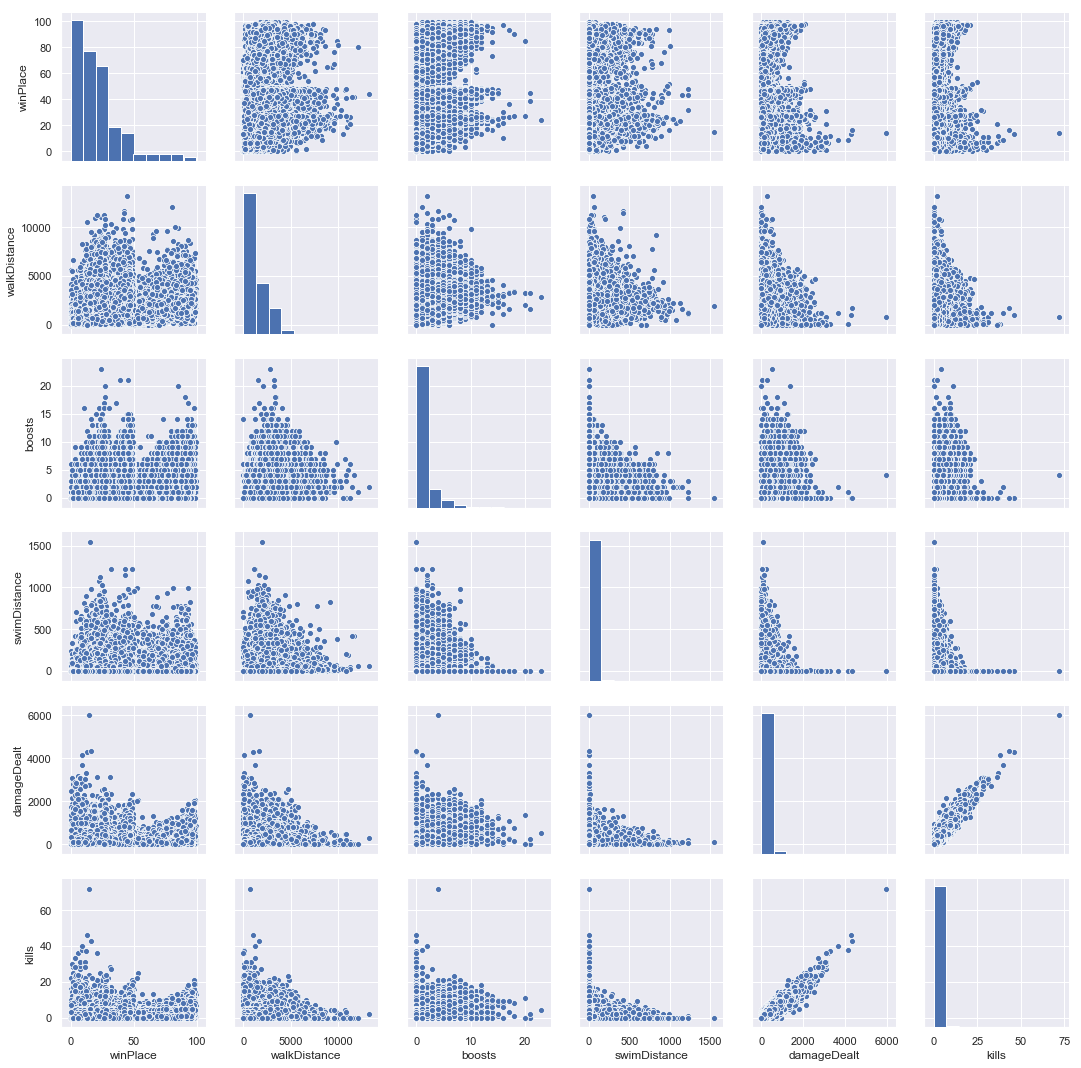

In [48]:
sns.set()
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'swimDistance', 'damageDealt','kills']
sns.pairplot(sample_df[cols], size = 2.5)
plt.show()

### damageDealt와, kills의 경우 서로 선형상관관계가 높으나, winplace와는 선형적인 관계가 아님

### winplace의 경우 매치 타입에 따라 달라지므로 match type에 따라 나눌 필요가 있음